# Loader + KDE

In [1]:
import sys
sys.path.append('../codes')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import pylab as plt

from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

## Load fragmentation mzML files containing combined MS1+MS2 data

In [5]:
def get_data_source(mzml_path, max_data, filename, ms_level, min_rt=None, max_rt=None):
    ds = DataSource()
    ds.load_data(mzml_path)
    data = {}
    for data_type in data_types:
        X = ds.get_data(data_type, filename, ms_level, min_rt=min_rt, max_rt=max_rt, max_data=max_data)  
        if data_type == INTENSITY:
            X = np.log(X)
        data[data_type] = X
        ds.plot_histogram(X, data_type)        
        ds.plot_boxplot(X, data_type)
    return data, ds

In [6]:
max_data = 50000
data_types = [MZ, INTENSITY, RT, N_PEAKS, SCAN_DURATION]
filename = None
ms_level = 1

## Check how the data looks like without thresholding

In [7]:
mzml_path = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Data\\multibeers_urine_data\\beers\\fragmentation'

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_10_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_11_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_12_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_13_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_14_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_15_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS M

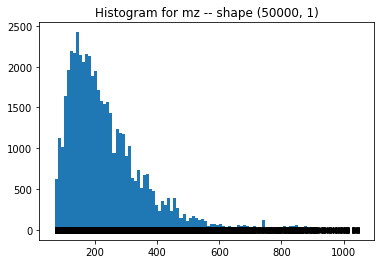

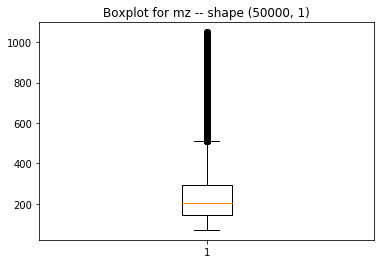

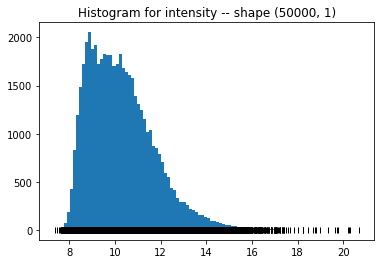

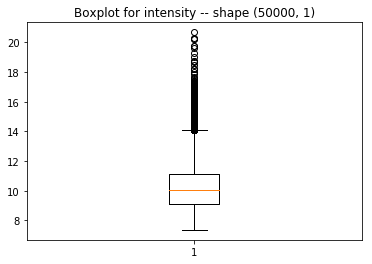

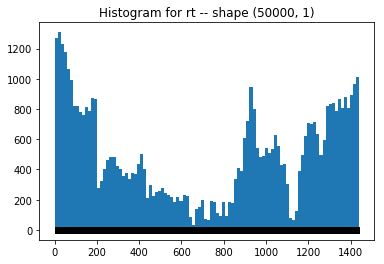

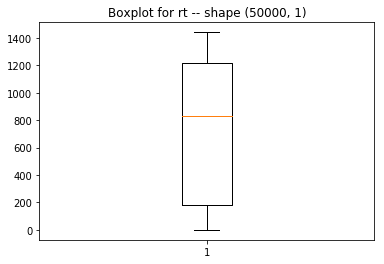

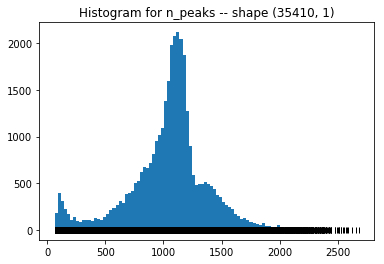

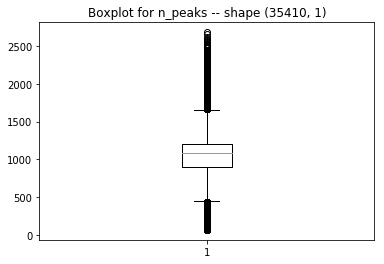

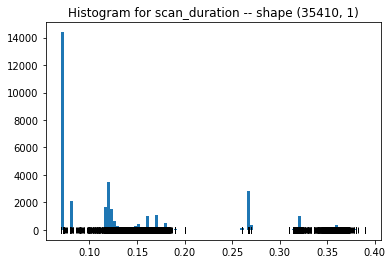

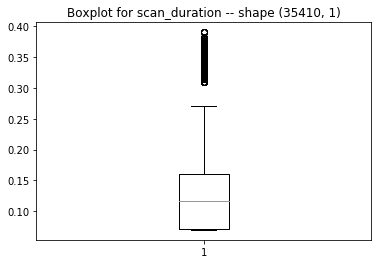

In [8]:
data_fragmentation, ds_fragmentation = get_data_source(mzml_path, max_data, filename, ms_level)

In [9]:
mzml_path = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Data\\multibeers_urine_data\\beers\\fullscan'

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_10_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_11_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_12_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_13_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_14_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_15_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Projec

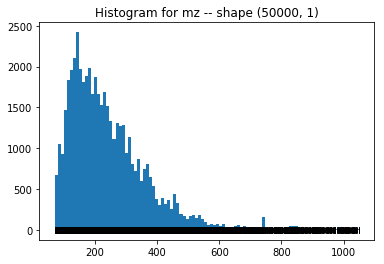

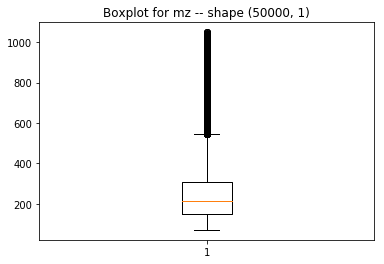

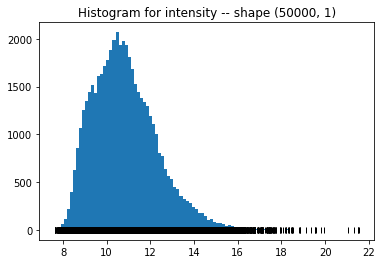

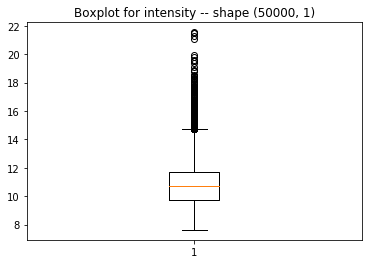

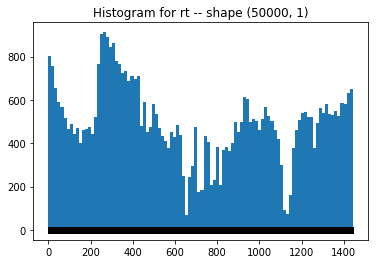

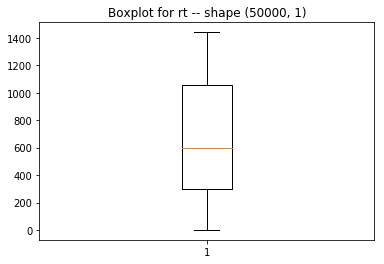

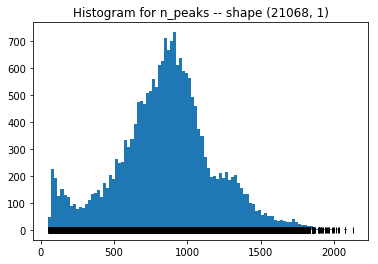

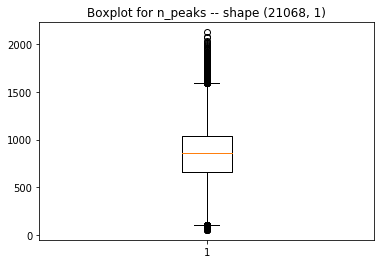

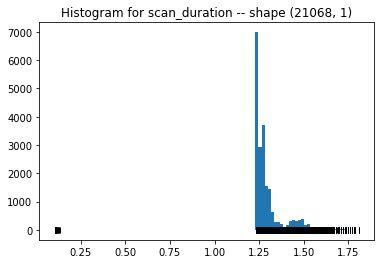

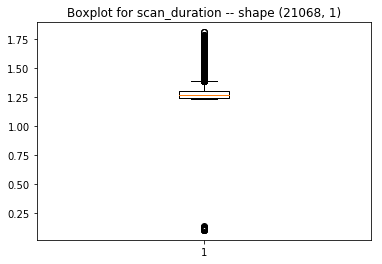

In [10]:
data_fullscan, ds_fullscan = get_data_source(mzml_path, max_data, filename, ms_level)

## Apply thresholding to the loaded data

Filtering parameters taken from https://www.dropbox.com/home/Meta_clustering/ms2lda/large_study/r/config?preview=config_beer_pos_3.yml for the beer data.
- rt_start: 3*60
- rt_end: 21*60
- min_MS1_intensity : 1E5 or 2E5 should do a decent job on Polyomics Q-Exactive data
- min_MS2_intensity: 5000

In [11]:
# min_ms1_intensity = 2.5E5
# min_ms2_intensity = 5000
min_ms1_intensity = 0
min_ms2_intensity = 0
min_rt = 3*60
max_rt = 21*60

In [12]:
mzml_path = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Data\\multibeers_urine_data\\beers\\fragmentation'

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_10_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_11_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_12_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_13_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_14_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_15_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS M

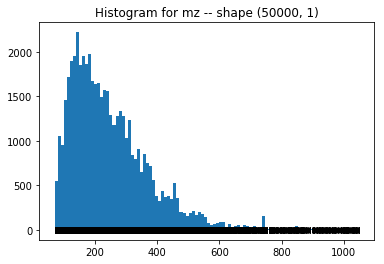

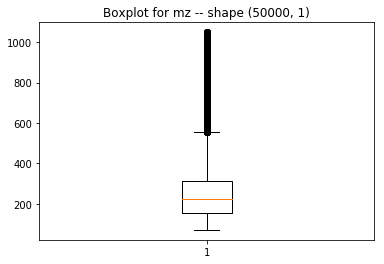

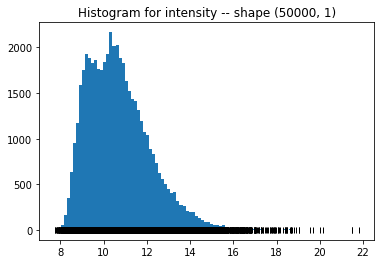

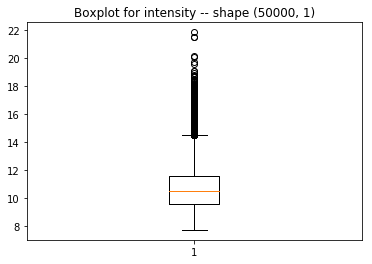

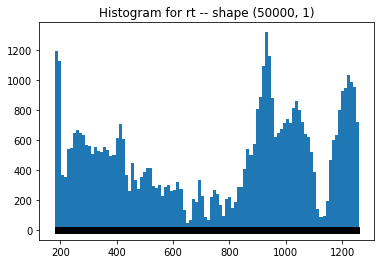

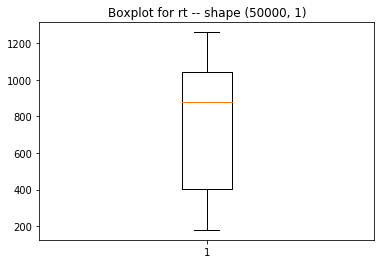

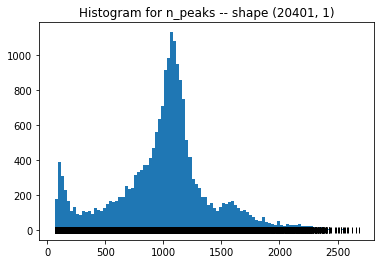

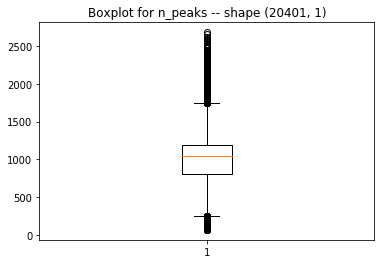

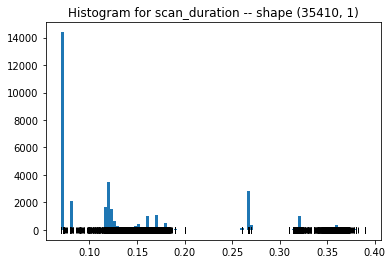

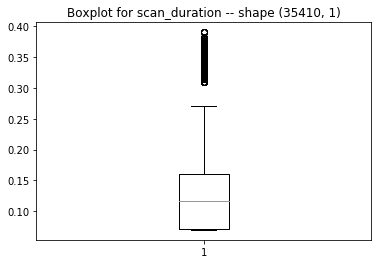

In [13]:
data_fragmentation, ds_fragmentation = get_data_source(mzml_path, max_data, filename, ms_level, min_rt=min_rt, max_rt=max_rt)

In [14]:
np.min(data_fragmentation[RT]), np.max(data_fragmentation[RT]), np.exp(np.min(data_fragmentation[INTENSITY]))

(180.001, 1259.99, 2281.6128)

In [15]:
mzml_path = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Data\\multibeers_urine_data\\beers\\fullscan'

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_10_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_11_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_12_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_13_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_14_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_15_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Projec

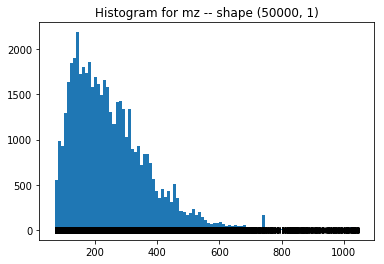

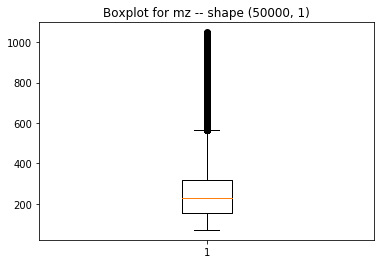

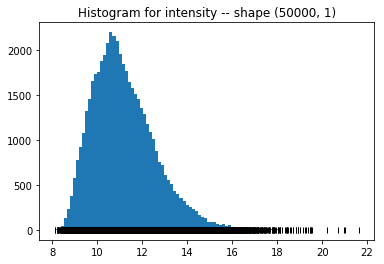

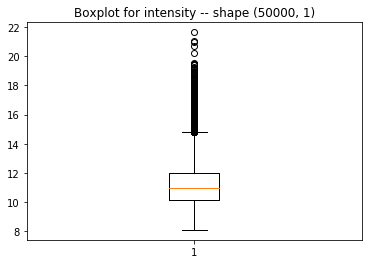

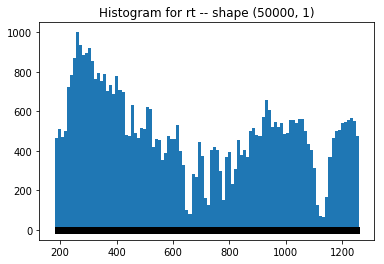

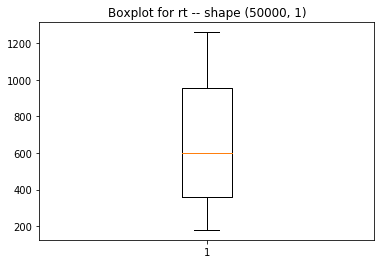

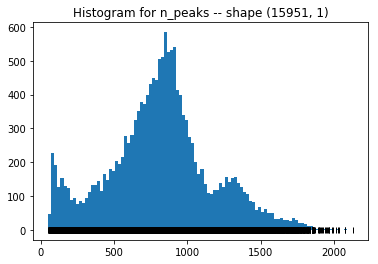

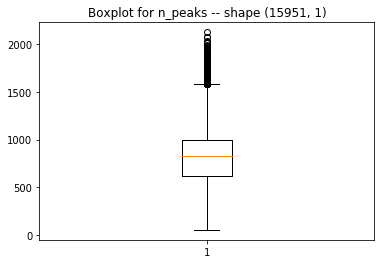

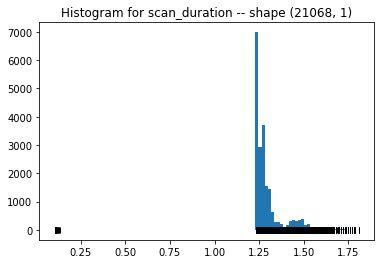

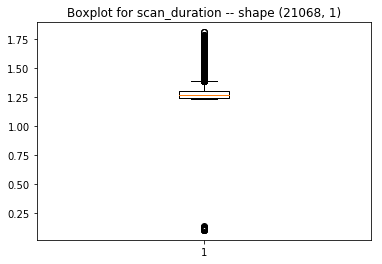

In [16]:
data_fullscan, ds_fullscan = get_data_source(mzml_path, max_data, filename, ms_level, min_rt=min_rt, max_rt=max_rt)

In [17]:
np.min(data_fragmentation[RT]), np.max(data_fragmentation[RT]), np.exp(np.min(data_fragmentation[INTENSITY]))

(180.001, 1259.99, 2281.6128)

## Train ms1 densities

In [18]:
filename = None
ms_level = 1

In [19]:
densities = DensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)

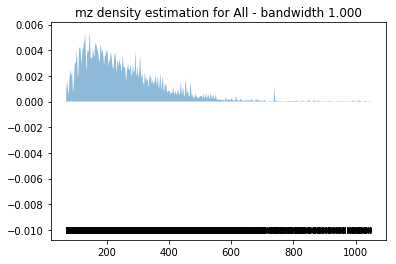

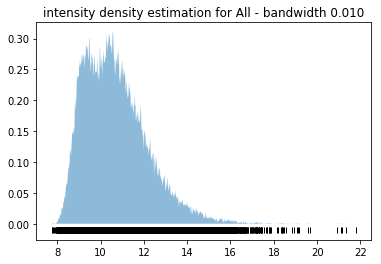

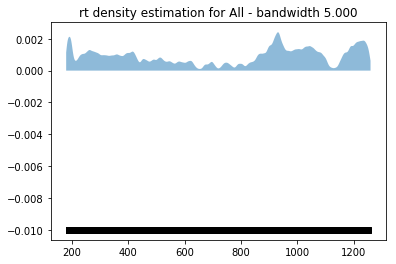

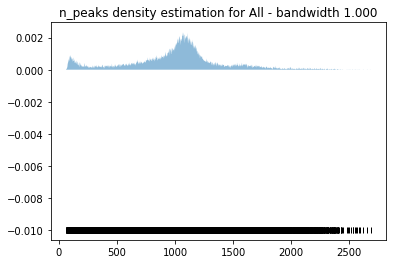

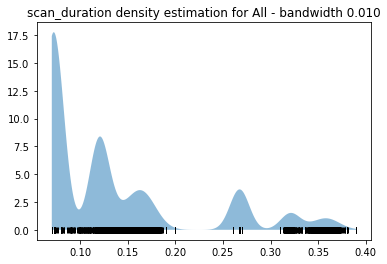

In [20]:
densities.kde(ds_fragmentation, filename, ms_level, bandwidth_mz=1.0, bandwidth_intensity=0.01, 
              bandwidth_rt=5.0, bandwidth_n_peaks=1.0, bandwidth_scan_durations=0.01, max_data=max_data)

In [21]:
densities.sample(ms_level, 10)

array([[ 264.99705523,   12.38697158,  944.3242186 ],
       [ 322.61838011,   12.68526768, 1057.47091971],
       [ 505.69380377,   13.93310636,  574.58393316],
       [ 291.73783693,   11.24790876, 1188.61440227],
       [ 115.57334578,   10.70649656,  267.18485892],
       [ 253.8233882 ,   11.09282295,  827.21507686],
       [ 146.12155169,   11.71157152, 1035.40031075],
       [ 138.23654553,   11.62833908, 1028.78877782],
       [ 423.52443491,   15.22245614,  901.52247035],
       [ 141.05641282,    8.85934016, 1072.21167786]])

In [22]:
densities.n_peaks(ms_level, 10)

array([[1142.80786327],
       [2016.06185788],
       [1248.57489831],
       [1184.85940895],
       [ 666.29120532],
       [1006.02617888],
       [1204.58388587],
       [1152.02102933],
       [1134.78039467],
       [1009.76222895]])

In [23]:
densities.scan_durations(ms_level, 10)

array([[0.05578369],
       [0.17133067],
       [0.07436481],
       [0.07596803],
       [0.08343364],
       [0.07602162],
       [0.09072147],
       [0.05431058],
       [0.29665376],
       [0.14258801]])

## Train ms2 densities

In [24]:
ms_level = 2

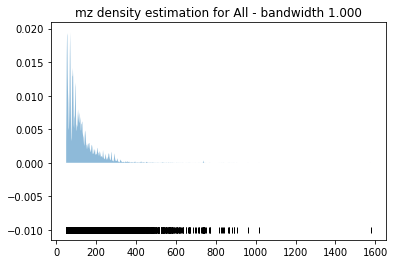

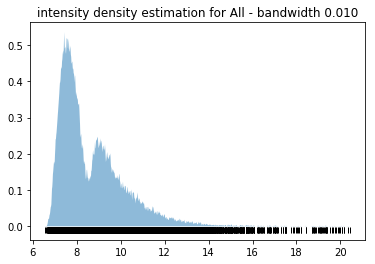

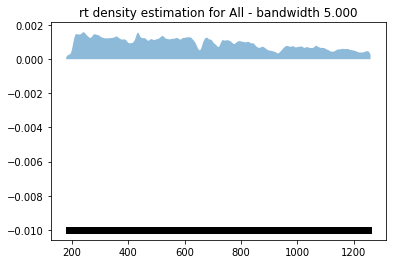

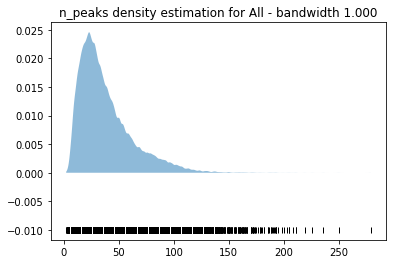

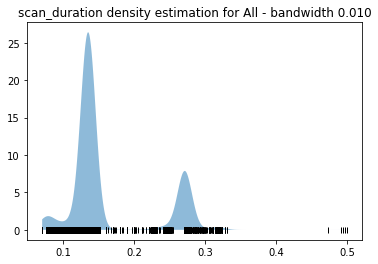

In [25]:
densities.kde(ds_fragmentation, filename, ms_level, bandwidth_mz=1.0, bandwidth_intensity=0.01, 
              bandwidth_rt=5.0, bandwidth_n_peaks=1.0, bandwidth_scan_durations=0.01, max_data=max_data)

## Alternative KDE where we fit the m/z and intensity together

### For beer1pos only

In [26]:
# min_ms1_intensity = 2.5E5
# min_ms2_intensity = 5000
min_ms1_intensity = 0
min_ms2_intensity = 0
min_rt = 3*60
max_rt = 21*60

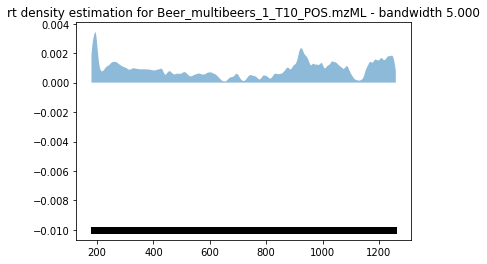

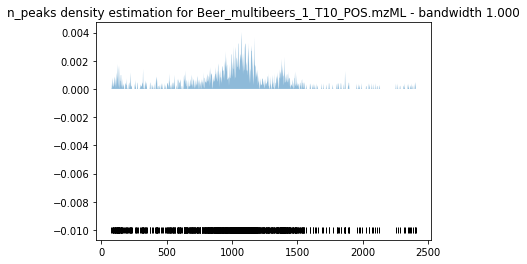

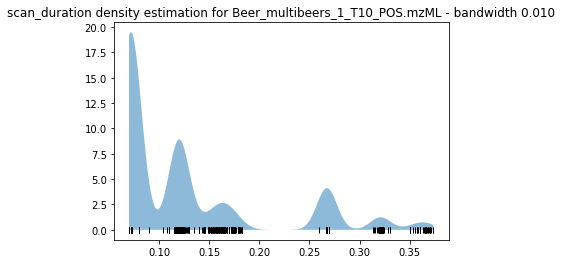

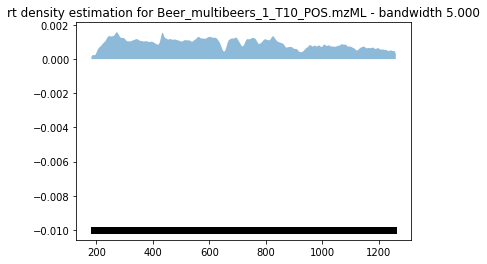

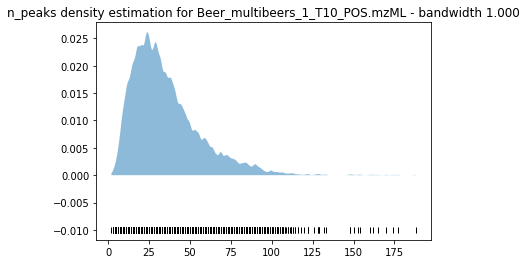

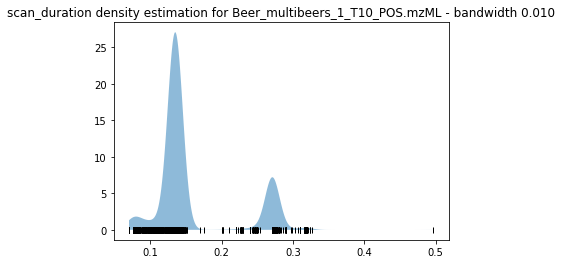

In [27]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fragmentation, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds_fragmentation, filename, 2, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_beer1pos_fragmentation.p')

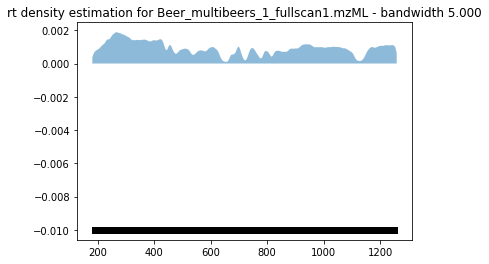

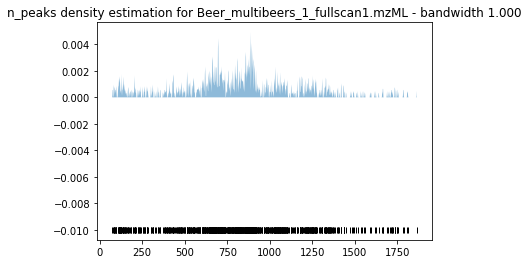

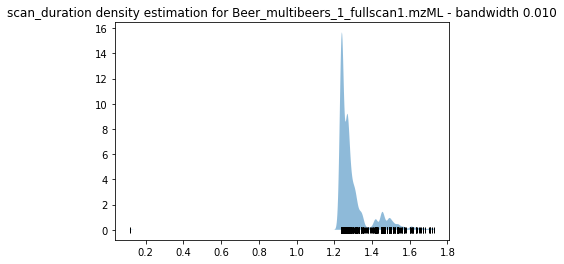

In [28]:
filename = 'Beer_multibeers_1_fullscan1.mzML'
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fullscan, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_beer1pos_fullscan.p')

### Train on all the 19 beers

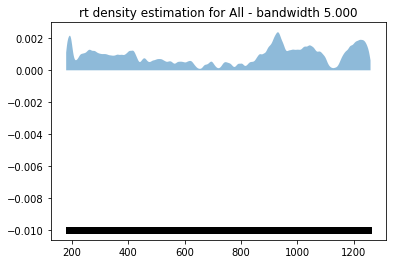

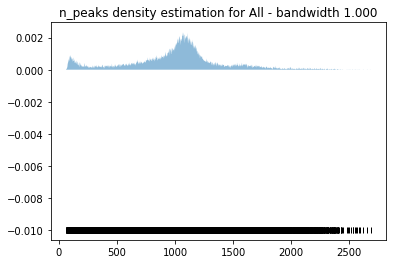

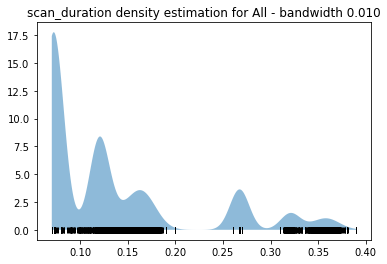

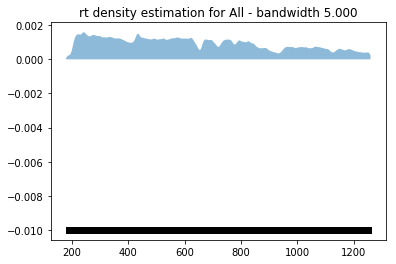

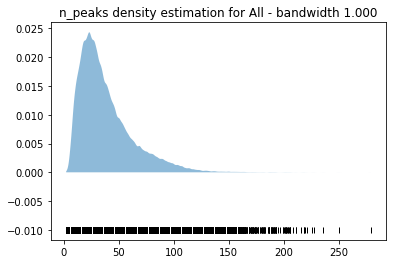

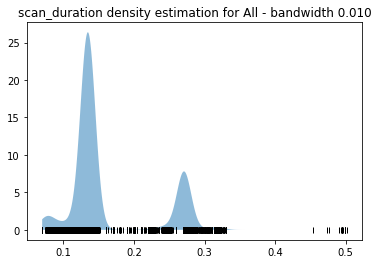

In [29]:
filename = None
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fragmentation, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds_fragmentation, filename, 2, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_19_beers_fragmentation.p')

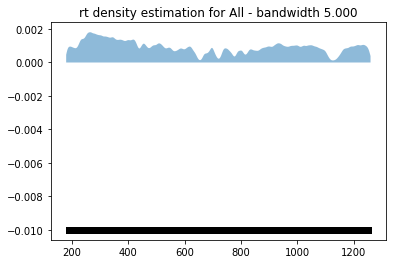

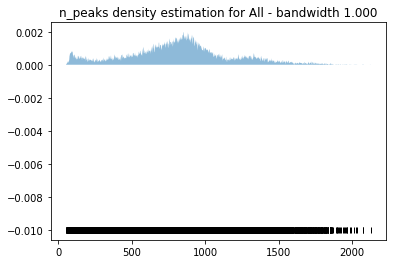

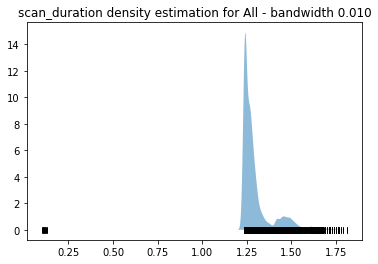

In [30]:
filename = None
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fullscan, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_19_beers_fullscan.p')